<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [46]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score


import pandas_profiling
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [47]:
#reading the data

df = pd.read_csv("vehicle.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [48]:
df.shape

(846, 19)

In [49]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [50]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [51]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [52]:
len(df.columns)

19

In [53]:
for i, col in enumerate(df.drop("class",axis=1).columns):
    median = df[col].median()
    df[col].fillna(median, inplace=True)

In [54]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

In [55]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [56]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [57]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [58]:
for i, col in enumerate(df.columns):
    print(f"{col}: {df.dtypes[i]}")

compactness: int64
circularity: float64
distance_circularity: float64
radius_ratio: float64
pr.axis_aspect_ratio: float64
max.length_aspect_ratio: int64
scatter_ratio: float64
elongatedness: float64
pr.axis_rectangularity: float64
max.length_rectangularity: int64
scaled_variance: float64
scaled_variance.1: float64
scaled_radius_of_gyration: float64
scaled_radius_of_gyration.1: float64
skewness_about: float64
skewness_about.1: float64
skewness_about.2: float64
hollows_ratio: int64
class: object


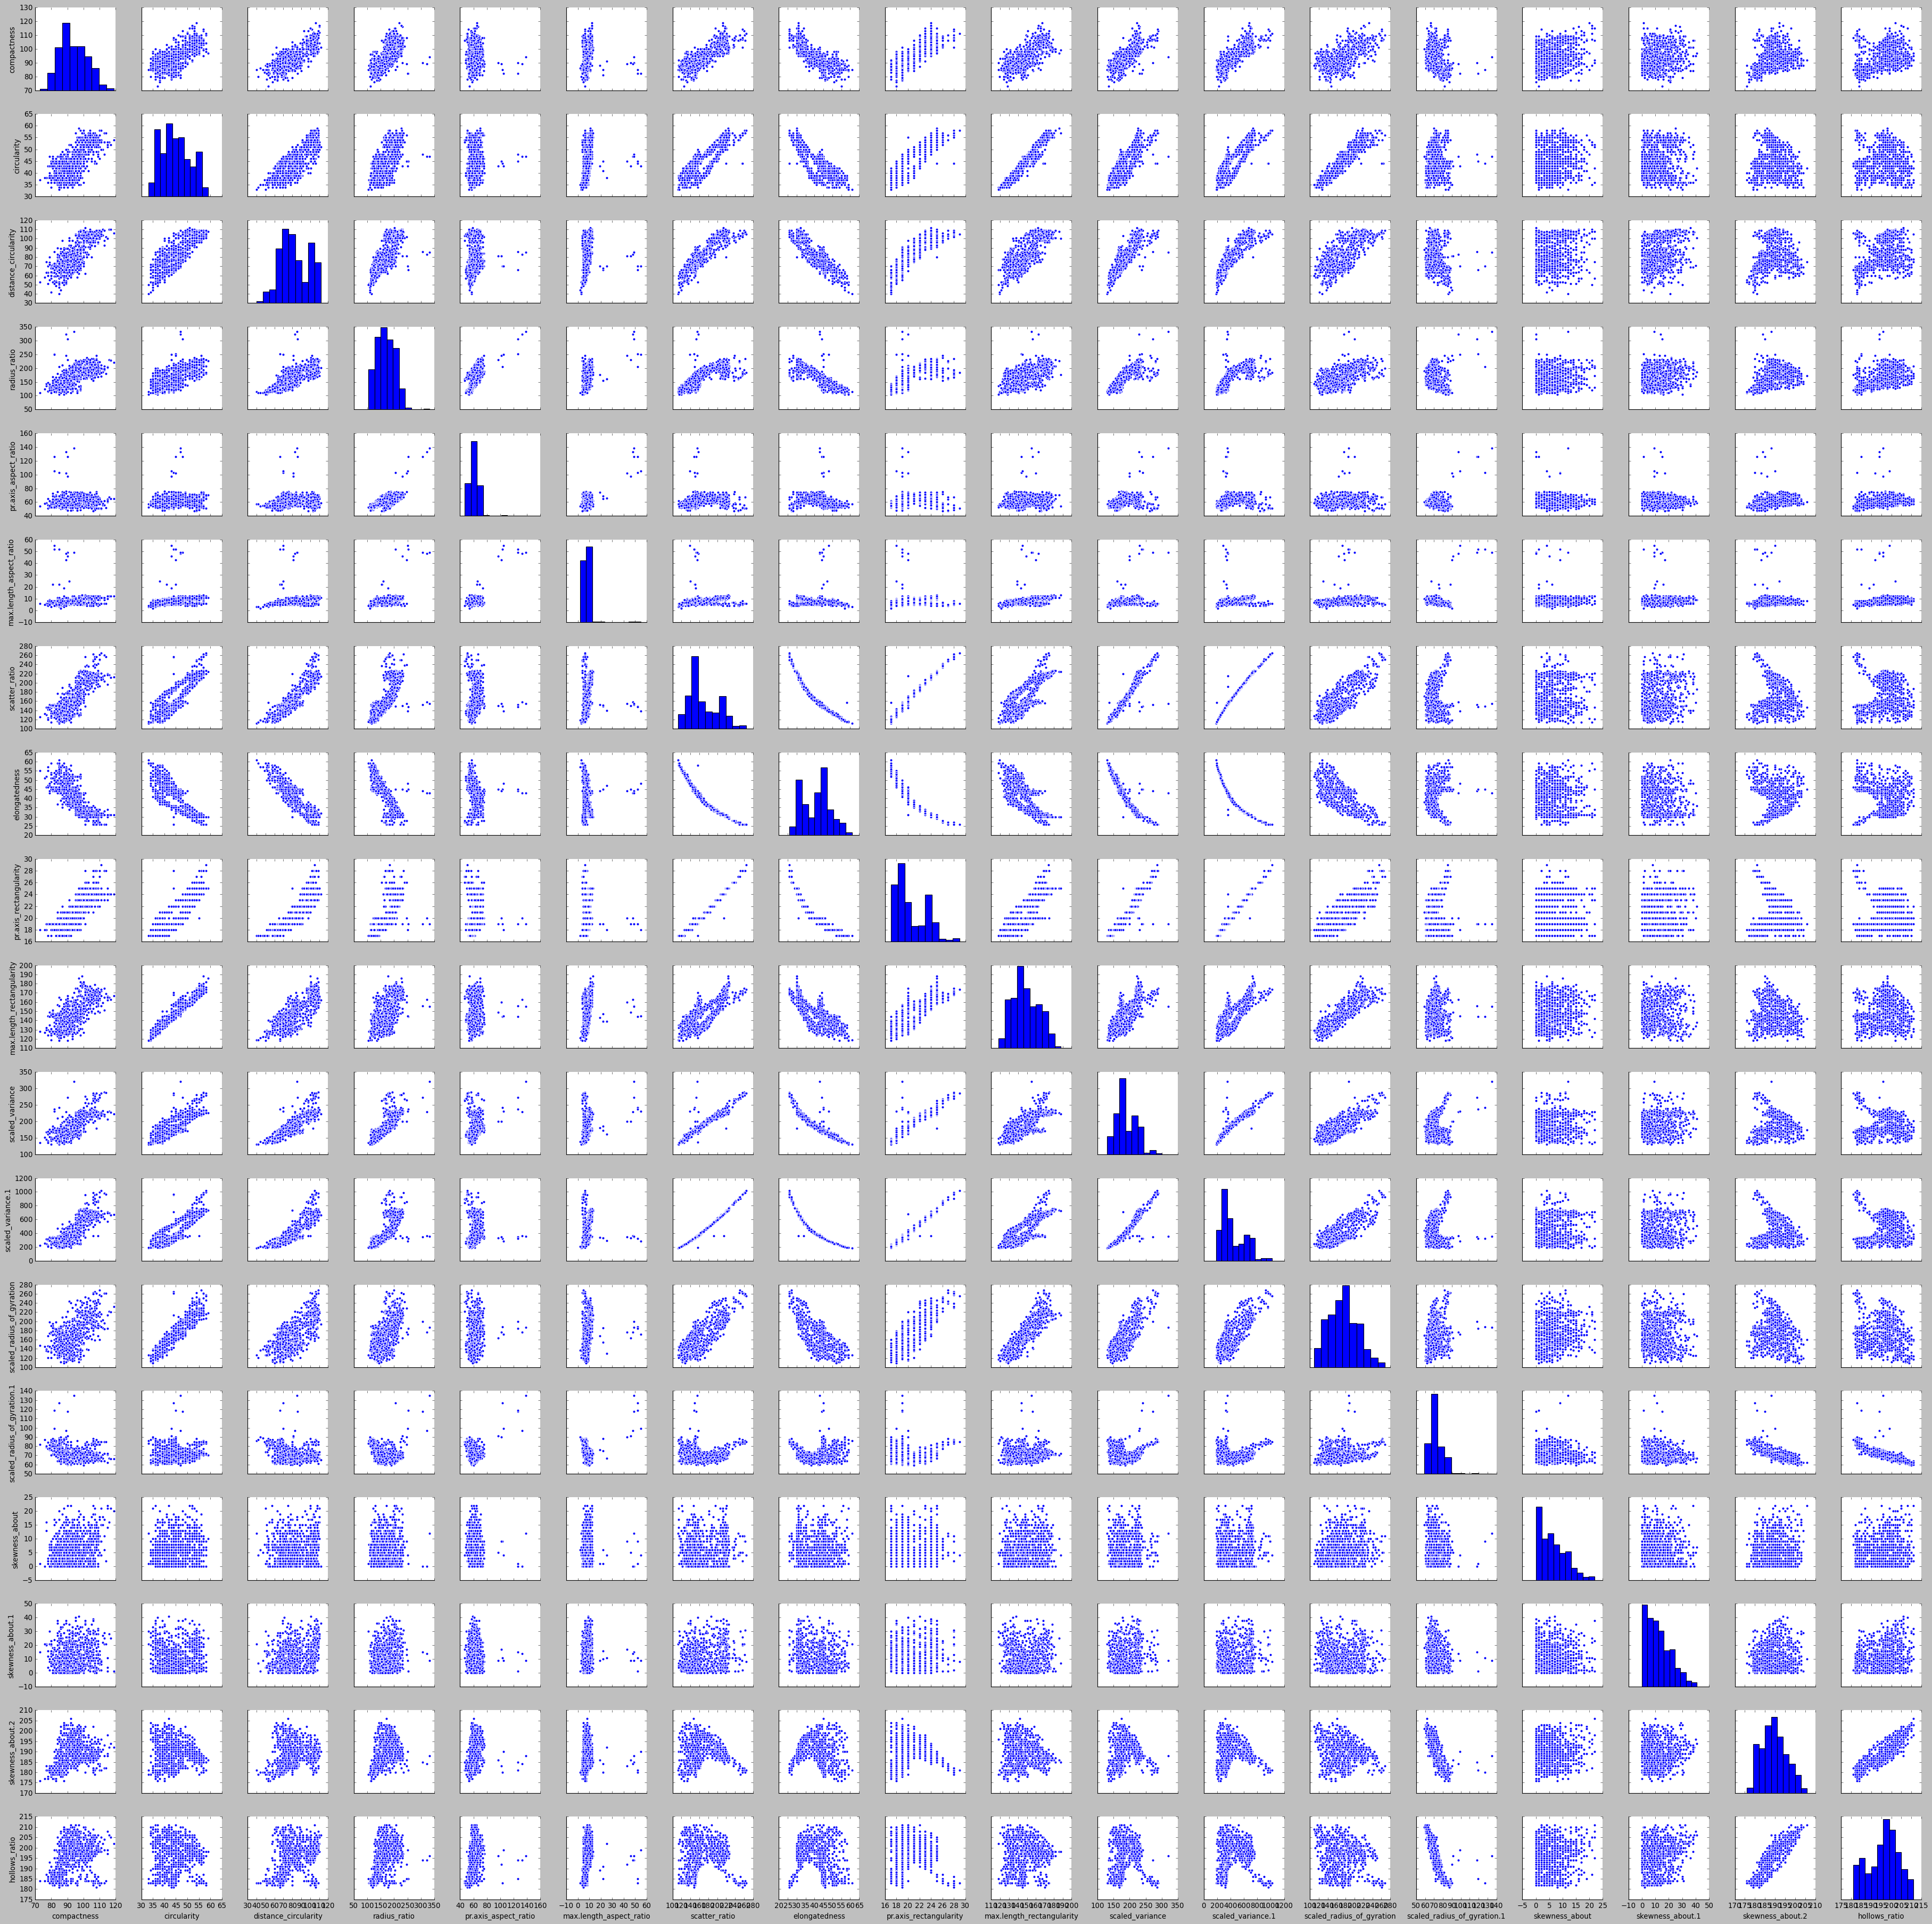

In [84]:
sns.pairplot(df)

In [59]:
profile = pandas_profiling.ProfileReport(df, title="Pandas Profiling Report")


In [60]:
# profile


In [61]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df)

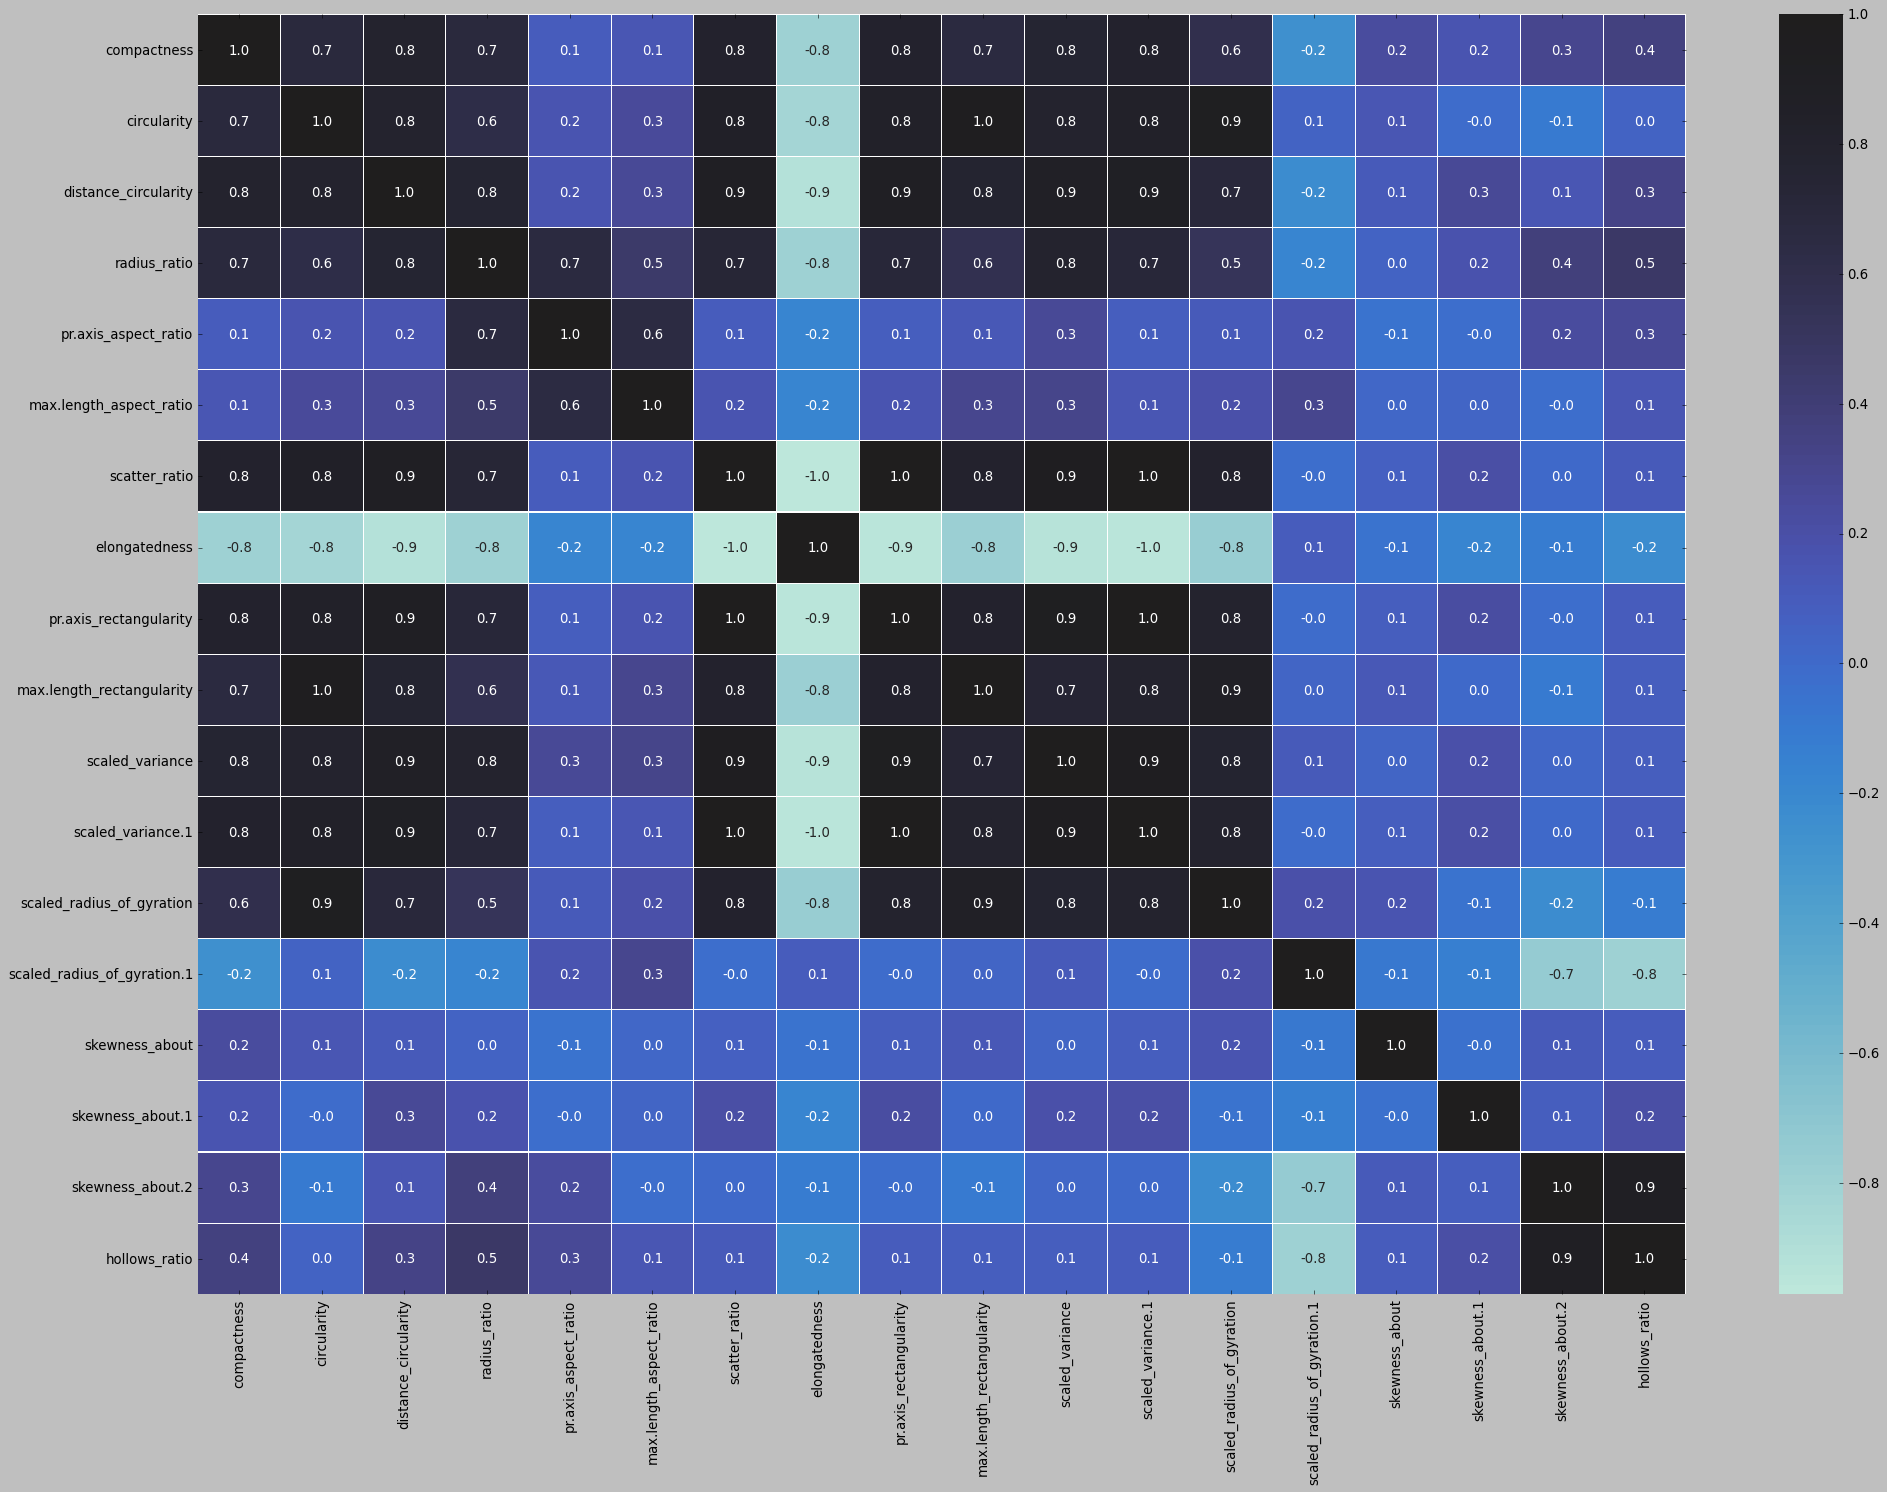

In [85]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )
plt.show()

In [63]:
cutoff = 0.9  # only datapoints with correlations higher than or equal to cutoff to be plotted.
hi_corr_df = df.drop('class', axis=1).corr()[abs(df.corr())>=cutoff].round(2)

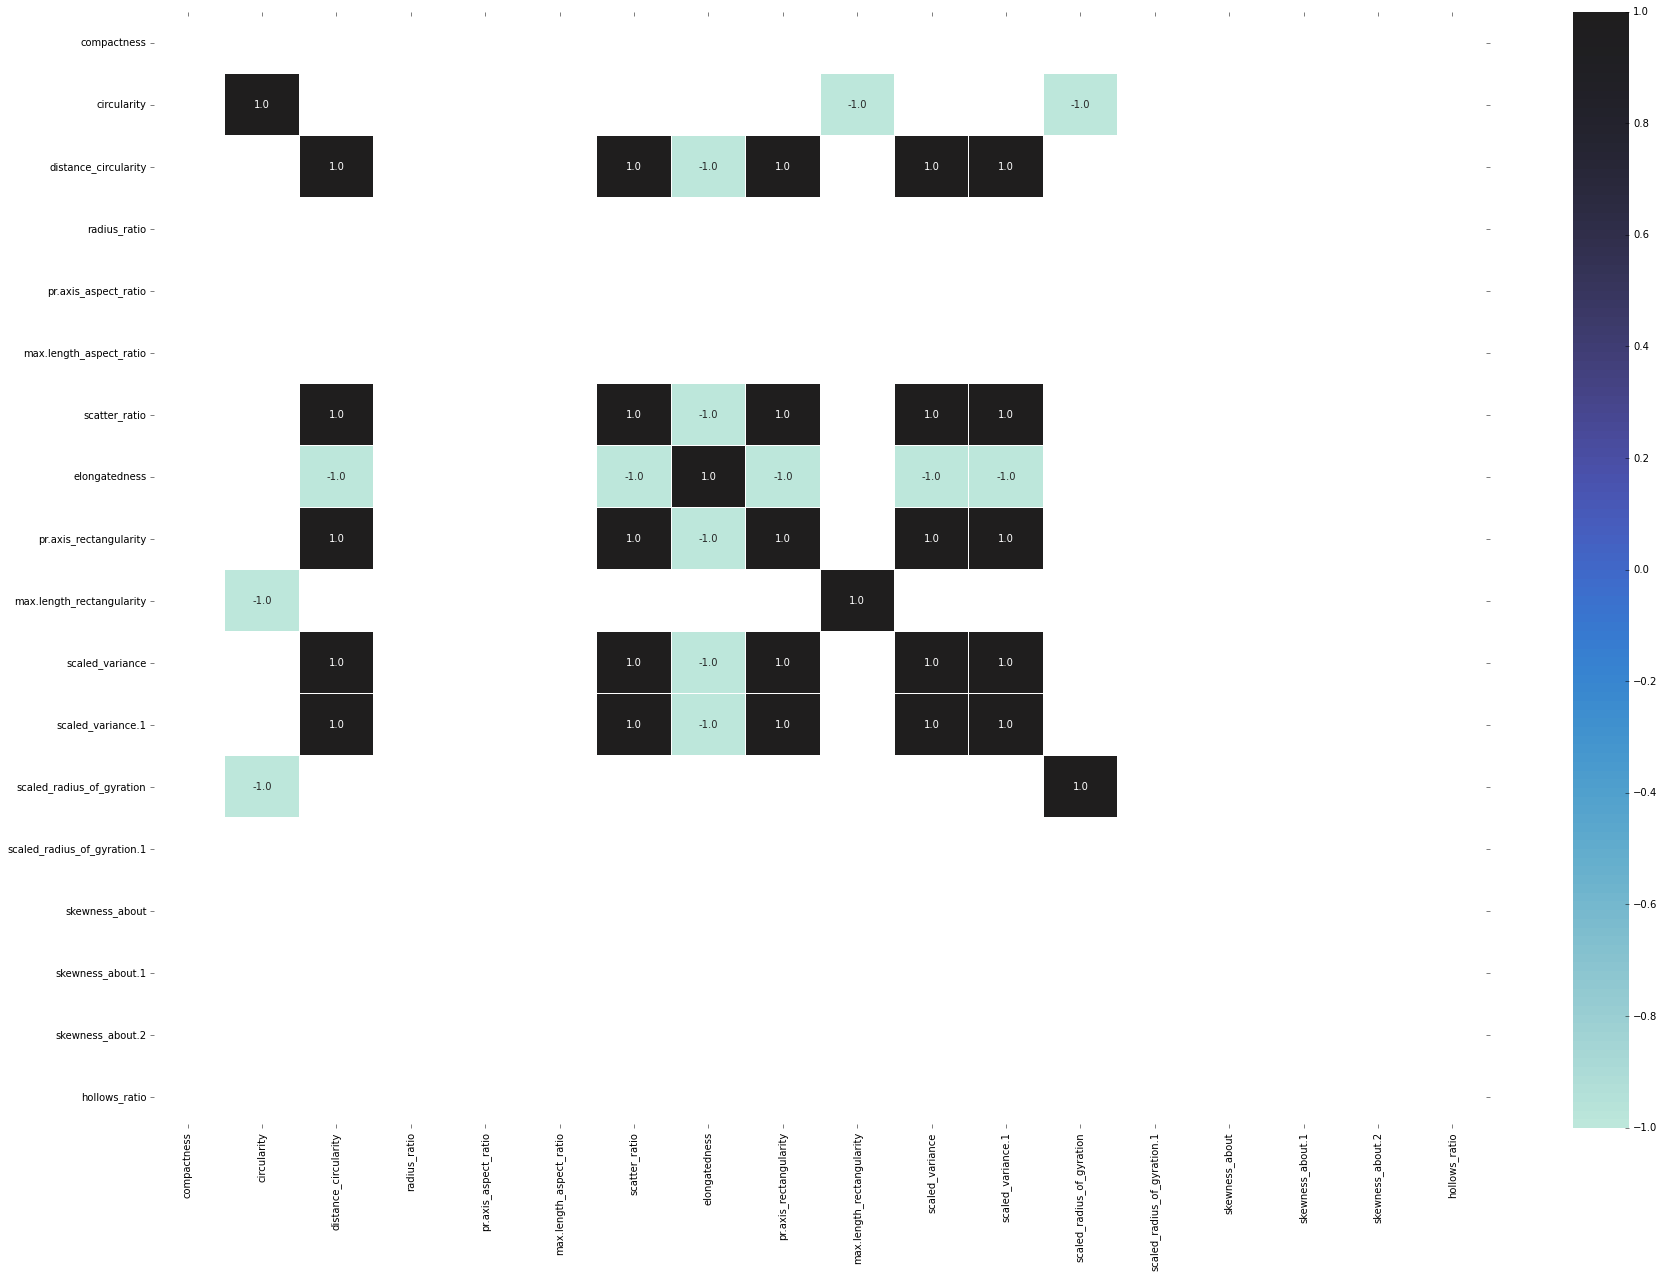

In [64]:
plt.figure(figsize=(30,20))
sns.heatmap(hi_corr_df.corr(), annot=True, linewidths=.1, fmt= '.1f', center = 1 )  # heatmap
plt.show()

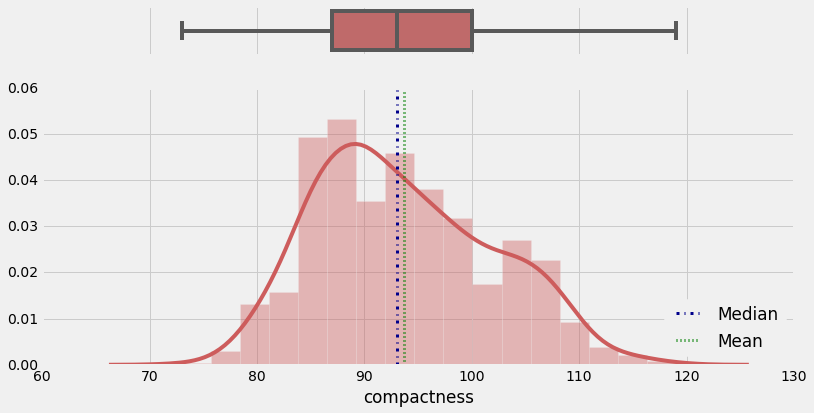

Skewness of compactness is: 0.381, hence the distribution is fairly normal.
------------------------------------------------------------------------


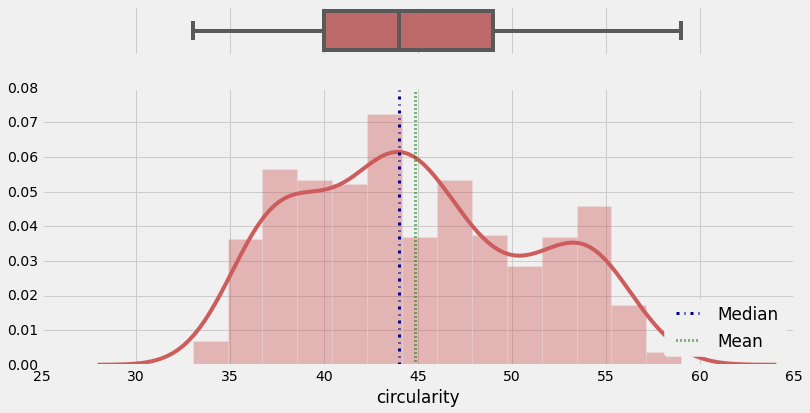

Skewness of circularity is: 0.264, hence the distribution is fairly normal.
------------------------------------------------------------------------


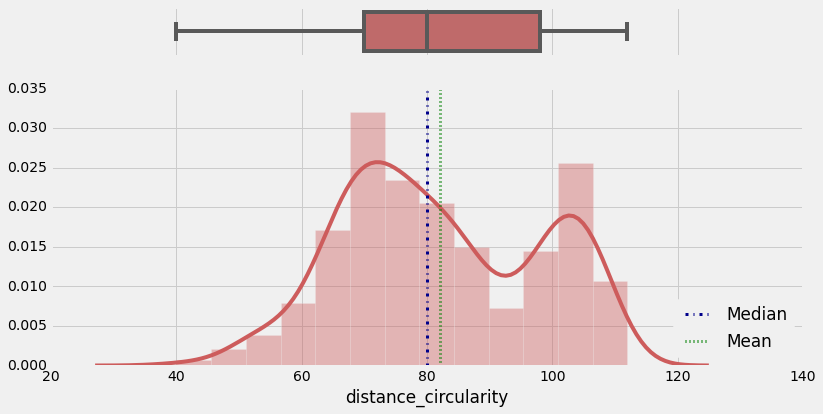

Skewness of distance_circularity is: 0.109, hence the distribution is fairly normal.
------------------------------------------------------------------------


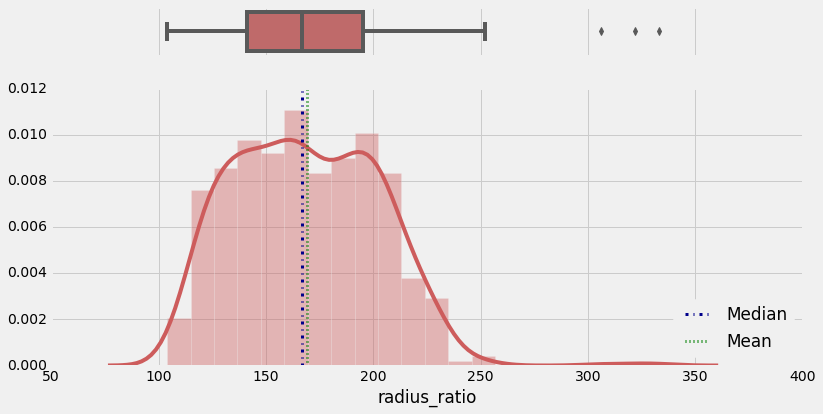

Skewness of radius_ratio is: 0.397, hence the distribution is fairly normal.
------------------------------------------------------------------------


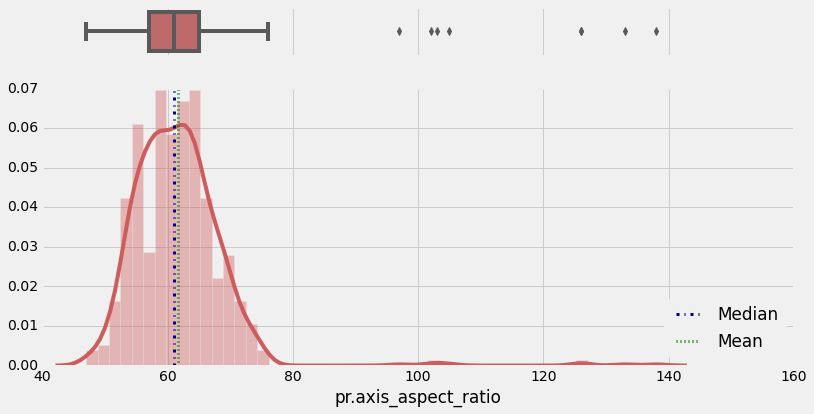

Skewness of pr.axis_aspect_ratio is: 3.829, hence it is right skewed
------------------------------------------------------------------------


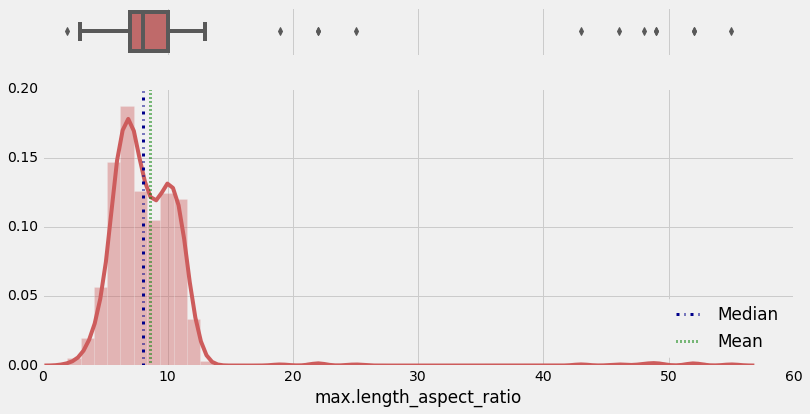

Skewness of max.length_aspect_ratio is: 6.766, hence it is right skewed
------------------------------------------------------------------------


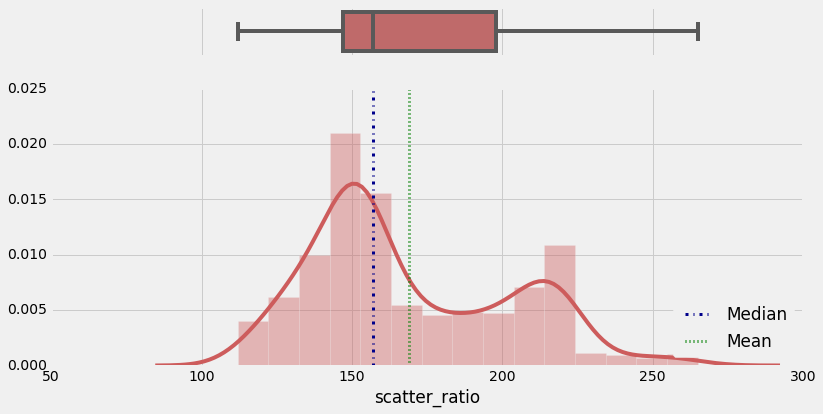

Skewness of scatter_ratio is: 0.608, hence it is right skewed
------------------------------------------------------------------------


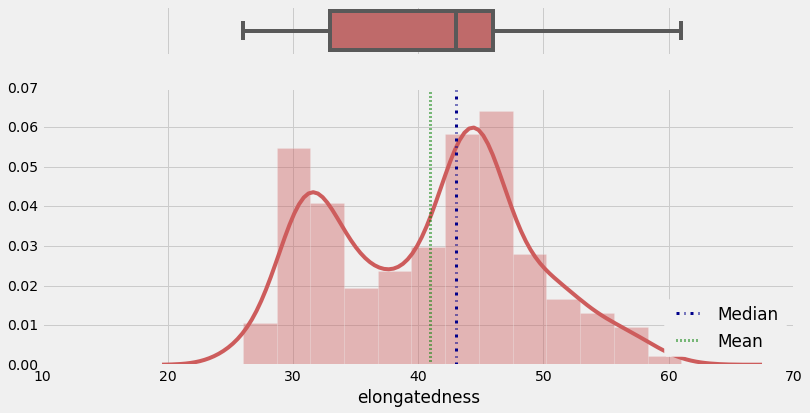

Skewness of elongatedness is: 0.047, hence the distribution is fairly normal.
------------------------------------------------------------------------


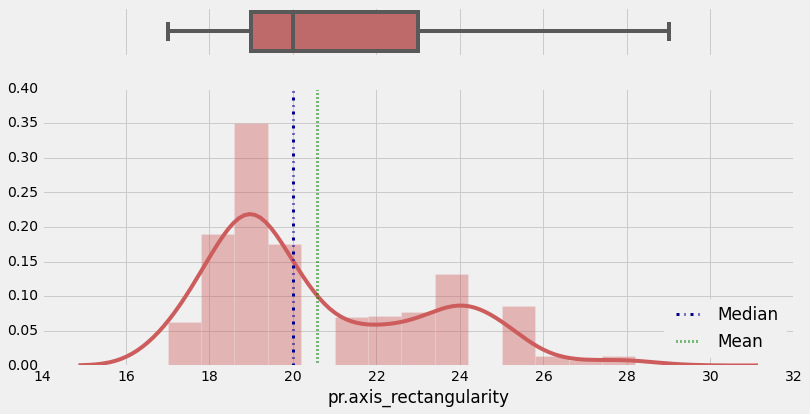

Skewness of pr.axis_rectangularity is: 0.773, hence it is right skewed
------------------------------------------------------------------------


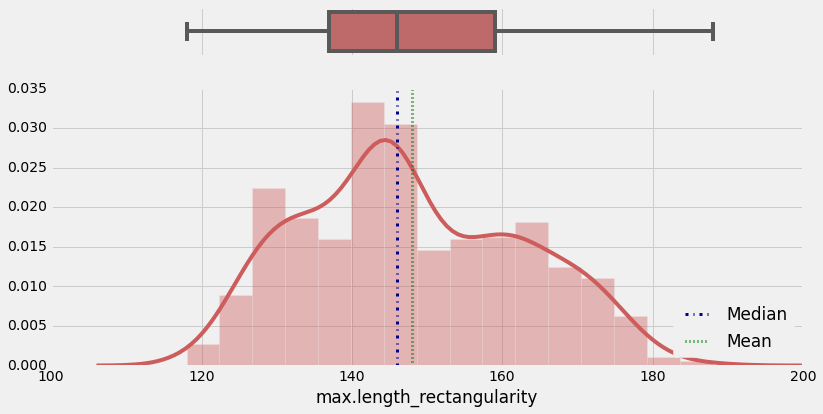

Skewness of max.length_rectangularity is: 0.256, hence the distribution is fairly normal.
------------------------------------------------------------------------


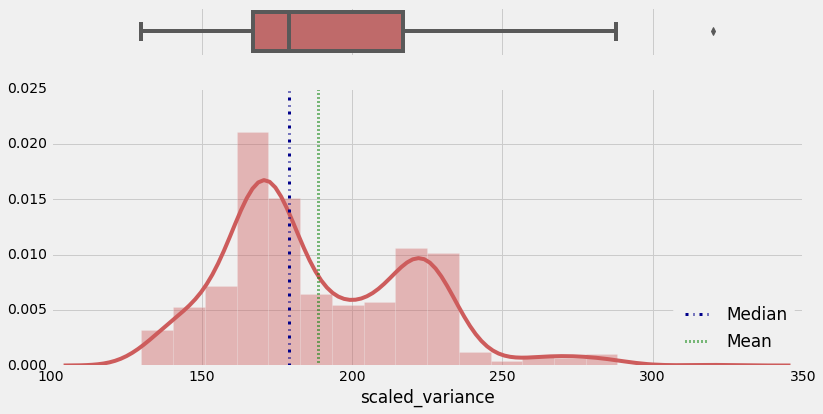

Skewness of scaled_variance is: 0.654, hence it is right skewed
------------------------------------------------------------------------


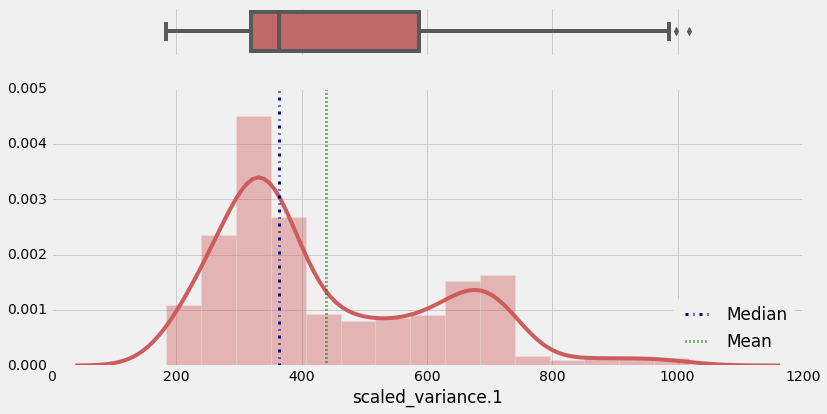

Skewness of scaled_variance.1 is: 0.844, hence it is right skewed
------------------------------------------------------------------------


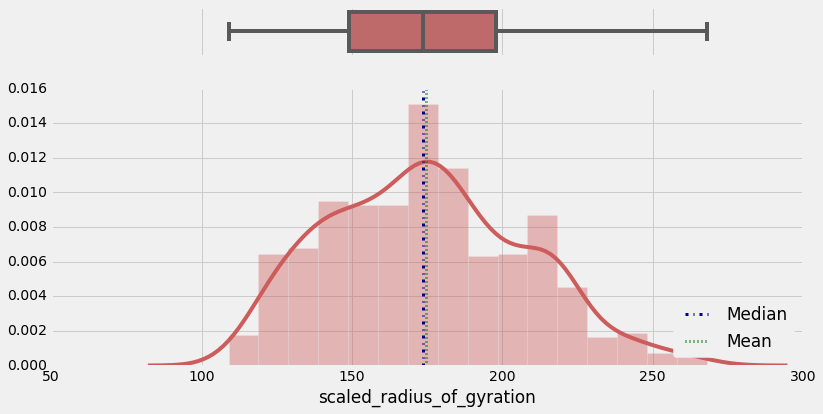

Skewness of scaled_radius_of_gyration is: 0.279, hence the distribution is fairly normal.
------------------------------------------------------------------------


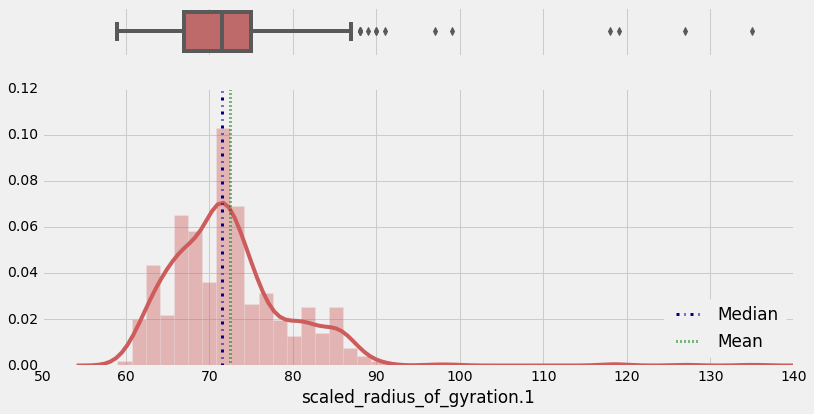

Skewness of scaled_radius_of_gyration.1 is: 2.086, hence it is right skewed
------------------------------------------------------------------------


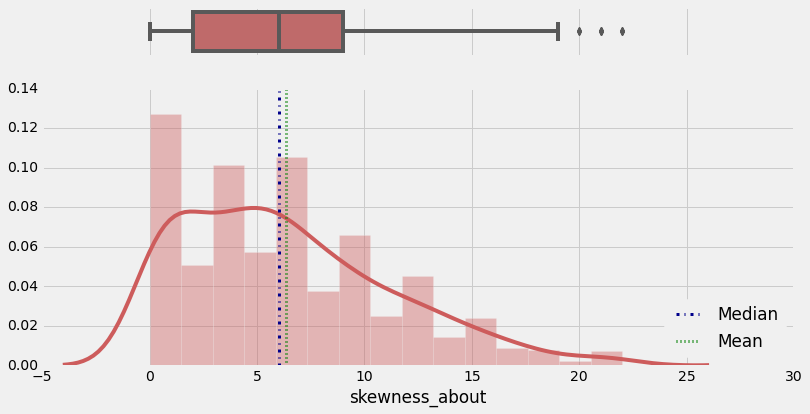

Skewness of skewness_about is: 0.779, hence it is right skewed
------------------------------------------------------------------------


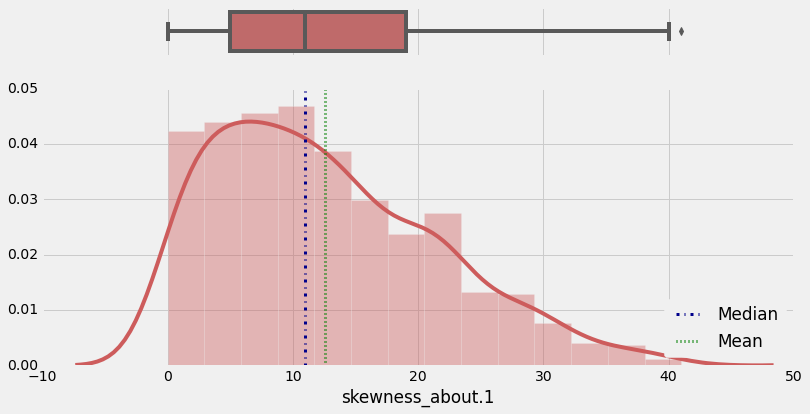

Skewness of skewness_about.1 is: 0.688, hence it is right skewed
------------------------------------------------------------------------


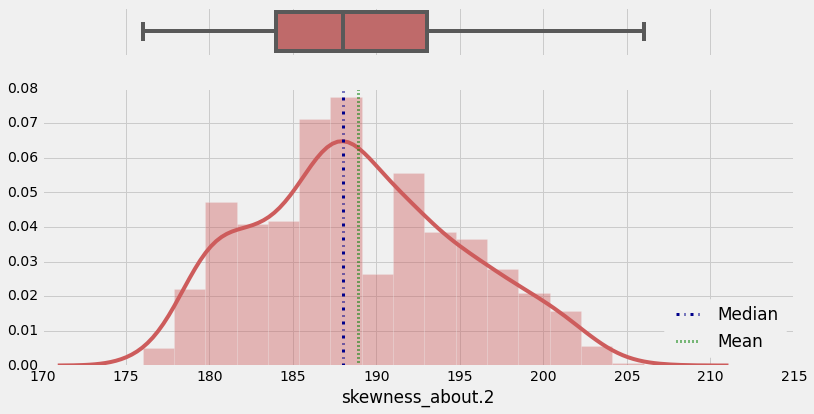

Skewness of skewness_about.2 is: 0.25, hence the distribution is fairly normal.
------------------------------------------------------------------------


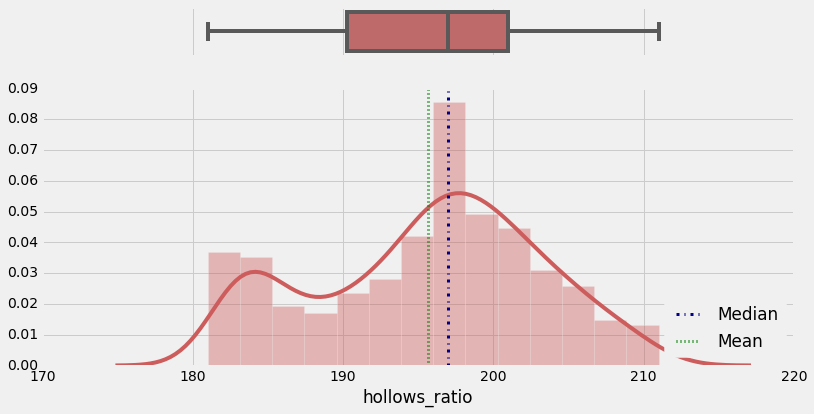

Skewness of hollows_ratio is: -0.226, hence the distribution is fairly normal.
------------------------------------------------------------------------


In [65]:
#loop to plot all numerical attributes
for i, col in enumerate(df.drop("class",axis=1).columns):
    plt.style.use('fivethirtyeight')    
    # create a subplot with 2 windows: one boxplot, one histogram
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,6))
    sns.boxplot(df[col], ax=ax_box, color="indianred");
    sns.distplot(df[col], ax=ax_hist, color="indianred");
    
    #vertical lines for median and mode
    plt.axvline(np.median(df[col]),color='darkblue', linestyle='-.',label="Median", lw=3)
    plt.axvline(np.mean(df[col]),color='green',  linestyle=':',label="Mean", lw=3)   
    
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=col)
    plt.legend(loc="lower right")
    
#     x=df[col]
#     mu = x.mean()
#     median = np.median(x)
#     sigma = x.std()
#     textstr = '\n'.join((r'$\mu=%.5f$' % (mu, ), 
#                          r'$\mathrm{median}=%.5f$' % (median, ), 
#                          r'$\sigma=%.5f$' % (sigma, )))


    # place a text box in upper left in axes coords
#     props = dict(boxstyle='round', facecolor='wheat', alpha=1)
#     ax_hist.text(0.70, 0.95, textstr, transform=ax_hist.transAxes, fontsize=14,
#             verticalalignment='top', bbox=props)

    plt.show();

    #skewness
    skewness = stats.skew(df[col]);
    if(abs(skewness)<0.5):
        print(f"Skewness of {col} is: {round(skewness,3)}, hence the distribution is fairly normal." )
    elif(skewness>0.5):
        print(f"Skewness of {col} is: {round(skewness,3)}, hence it is right skewed" )
    else:
        print(f"Skewness of {col} is: {round(skewness,3)}, hence it is left skewed" )
        
    
    print("------------------------------------------------------------------------")
    
    

In [66]:
X=df.drop("class",axis=1)
y=df[["class"]]

In [67]:
from scipy.stats import zscore
XScaled= X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [68]:
covMatrix = np.cov(XScaled)
print(covMatrix)

[[ 0.19286273 -0.01905792 -0.03145059 ...  0.02626044  0.0171151
   0.00778001]
 [-0.01905792  0.20012053 -0.16768954 ... -0.34320898  0.20056905
   0.25605041]
 [-0.03145059 -0.16768954  0.55073518 ...  0.51126187 -0.45901802
  -0.57127103]
 ...
 [ 0.02626044 -0.34320898  0.51126187 ...  1.02896006 -0.57931804
  -0.75919628]
 [ 0.0171151   0.20056905 -0.45901802 ... -0.57931804  0.66651487
   0.60175978]
 [ 0.00778001  0.25605041 -0.57127103 ... -0.75919628  0.60175978
   0.79191369]]


In [69]:
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

In [70]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [71]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [72]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


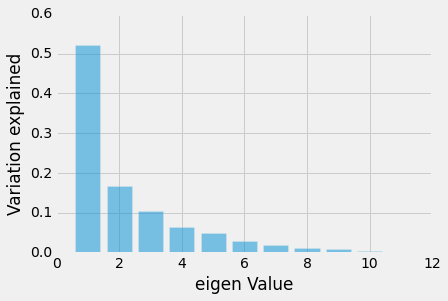

In [73]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

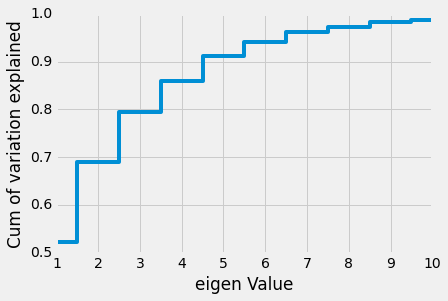

In [74]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [75]:
pca7 = PCA(n_components=7)
pca7.fit(X)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(XScaled)
pd.DataFrame(Xpca7)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

0         1          2         3         4         5         6
0    0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124
1   -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637
2    3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584
3   -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753
4    0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578
..        ...       ...        ...       ...       ...       ...       ...
841 -0.442648 -0.605884   0.197213 -1.444958  1.065425  0.820179 -0.041563
842 -0.314956  0.164511   0.794573 -0.908272 -0.235492 -1.438257 -0.599113
843  4.809174 -0.001249   0.532333  0.295652 -1.344236 -0.217070  0.573249
844 -3.294092 -1.008276  -0.357003 -1.933675  0.042768 -0.402491 -0.202406
845 -4.765053  0.334900  -0.568136 -1.224807 -0.054051 -0.335637  0.058098

[846 rows x 7 columns]

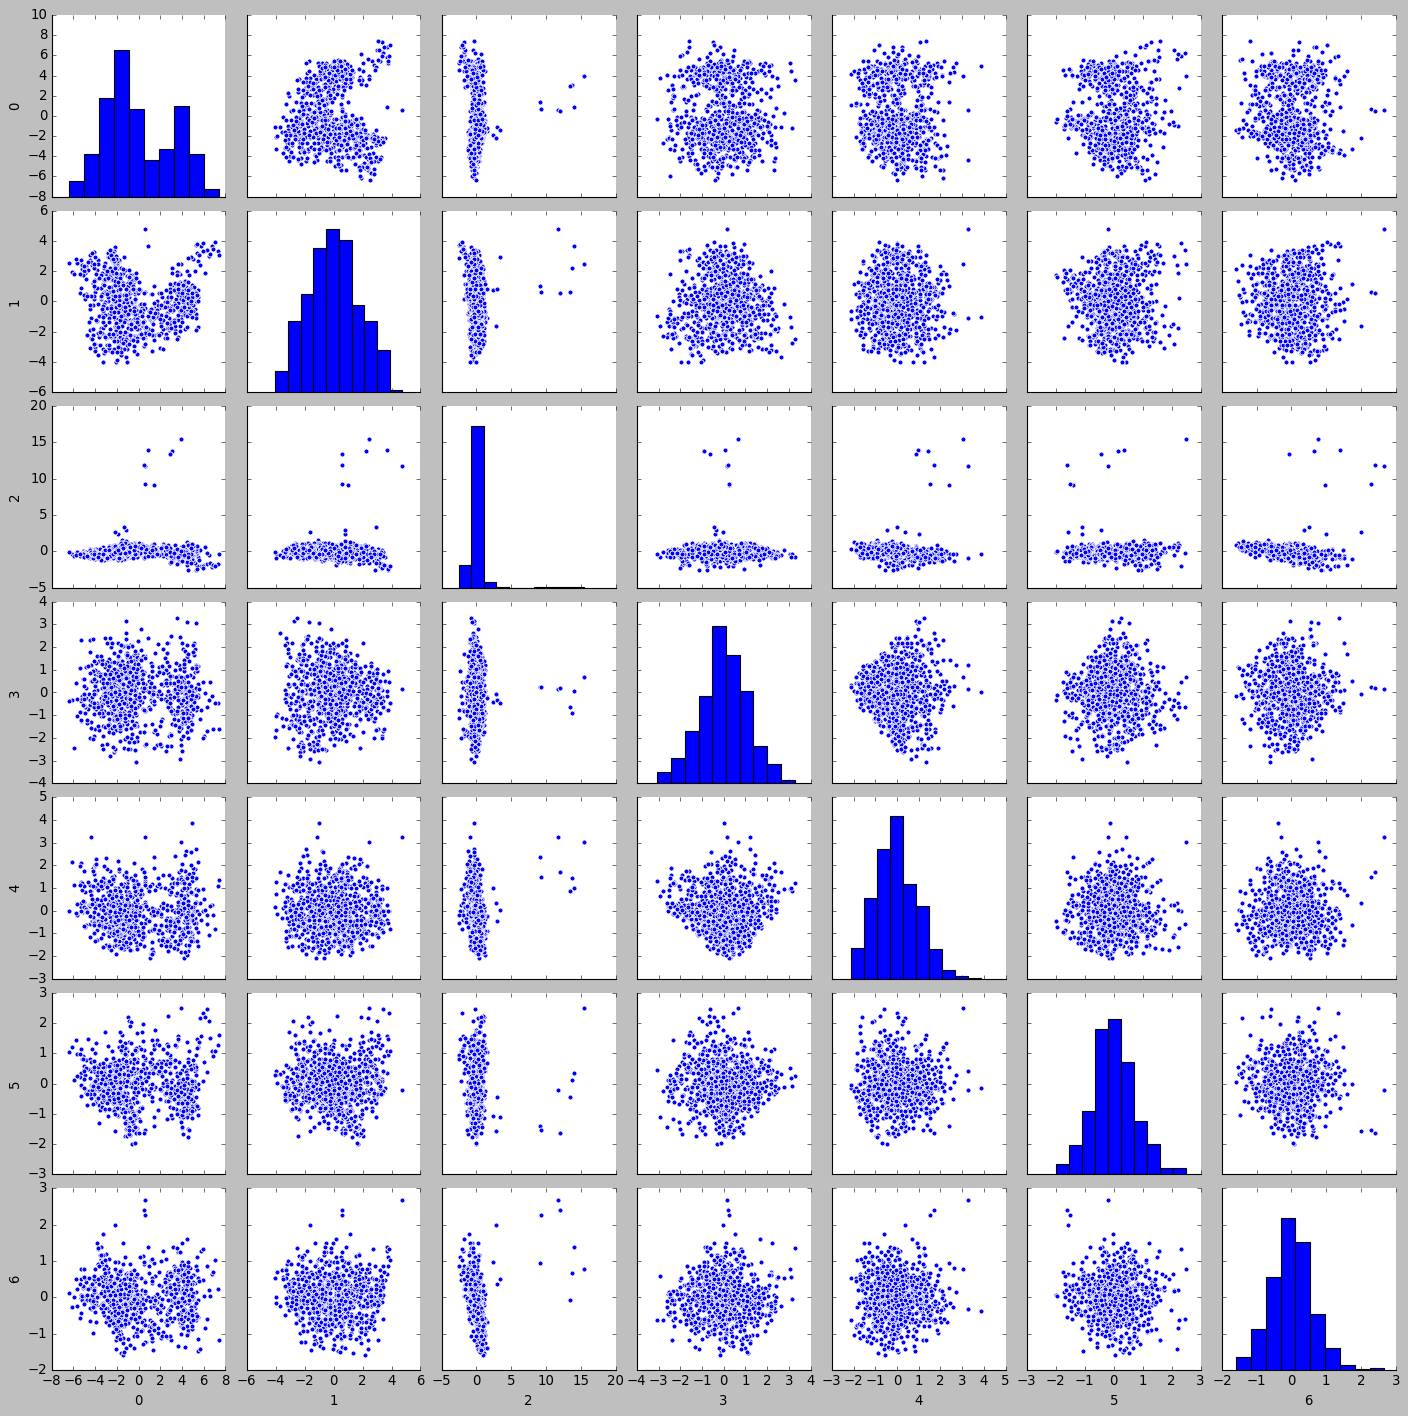

In [76]:
plt.style.use("classic")
sns.pairplot(pd.DataFrame(Xpca7))


In [81]:
X_train, X_test, y_train, y_test = train_test_split(Xpca7, y, test_size=0.3, random_state=0) 

In [82]:
from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)
pred

array(['car', 'bus', 'bus', 'car', 'car', 'car', 'van', 'car', 'bus',
       'car', 'bus', 'car', 'bus', 'bus', 'van', 'car', 'car', 'van',
       'van', 'car', 'bus', 'van', 'van', 'car', 'car', 'car', 'car',
       'bus', 'van', 'car', 'van', 'car', 'bus', 'car', 'van', 'bus',
       'bus', 'car', 'van', 'bus', 'bus', 'van', 'car', 'car', 'van',
       'car', 'car', 'car', 'car', 'bus', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'van', 'car', 'car', 'van', 'bus', 'van',
       'car', 'car', 'bus', 'car', 'car', 'van', 'car', 'van', 'car',
       'car', 'car', 'bus', 'bus', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'bus', 'van', 'car', 'car', 'van', 'bus', 'car',
       'bus', 'car', 'bus', 'van', 'car', 'car', 'car', 'car', 'bus',
       'car', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'car', 'car',
       'bus', 'bus', 'car', 'bus', 'car', 'car', 'car', 'car', 'car',
       'bus', 'car', 'car', 'bus', 'car', 'car', 'bus', 'car', 'car',
       'van', 'car',

In [83]:
score = accuracy_score(y_test,pred)
score

0.8149606299212598